In [ ]:
text_path = "/content/drive/MyDrive/Child Generator/families.txt"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [ ]:
data = pd.read_csv(text_path, sep='\t', header=None, usecols=[0,1,2],
                   names=['Serial', 'Role', 'Name'], engine='python')
# Display the first few rows of the data
print(data.head())

   Serial  Role             Name
0       0  FAMI            Obama
1       1  HUSB     Barack_Obama
2       1  WIFE   Michelle_Obama
3       1  DAUG  Malia_Ann_Obama
4       1  DAUG    Natasha_Obama


In [ ]:
data.describe()

,Serial
count,837.000000
mean,1.482676
std,1.056422
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [ ]:
families = data[data["Serial"] == 0].copy()
families.drop("Serial", axis=1, inplace=True)
families.reset_index(drop=True, inplace=True)
families.head()

,Role,Name
0,FAMI,Obama
1,FAMI,Bush
2,FAMI,Clinton
3,FAMI,Reagan
4,FAMI,Carter


In [ ]:
people = data[data["Serial"] != 0].copy()
people.drop("Serial", axis=1, inplace=True)
people.reset_index(drop=True, inplace=True)
people.head()


,Role,Name
0,HUSB,Barack_Obama
1,WIFE,Michelle_Obama
2,DAUG,Malia_Ann_Obama
3,DAUG,Natasha_Obama
4,HUSB,Barack_Obama_Sr


In [ ]:
# prompt: Using dataframe people: I want to get unique names, and drop the role  and call it people_only_df

# Create a new dataframe with only unique names
people_only_df = people.drop_duplicates(subset=['Name'])

# Drop the 'Role' column
people_only_df = people_only_df.drop('Role', axis=1)


In [ ]:
people_only_df.head()

,Name
0,Barack_Obama
1,Michelle_Obama
2,Malia_Ann_Obama
3,Natasha_Obama
4,Barack_Obama_Sr


In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Role    736 non-null    object
 1   Name    736 non-null    object
dtypes: object(2)
memory usage: 11.6+ KB


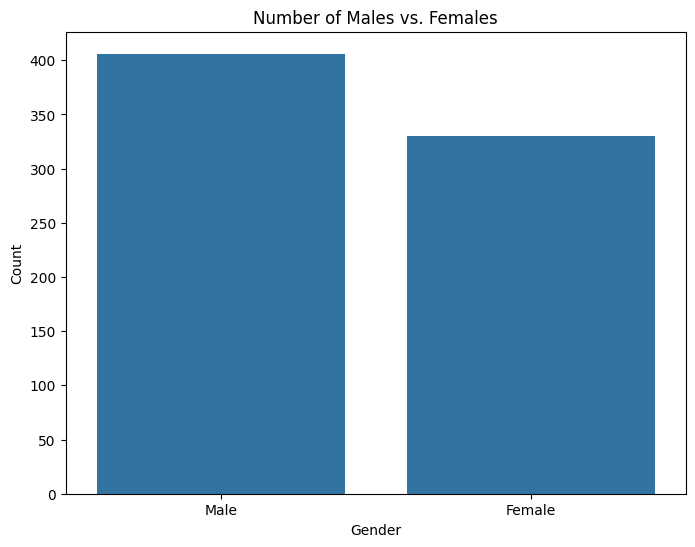

In [ ]:
# prompt: I want to plot a graph using seaborn that shows how many males (HUSB + SONN) compared to females (WIFE + DAUG)
# I just want male vs female not sonn vs father vs daughter vs mother

# Count the occurrences of each role
role_counts = people['Role'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [role_counts['HUSB'] + role_counts['SONN'], role_counts['WIFE'] + role_counts['DAUG']]
})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', data=plot_data)
plt.title('Number of Males vs. Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
# prompt: I want to find how many nuclear families there are.

# Calculate the number of nuclear families
nuclear_families = len(families)

# Print the result
print(f"The number of nuclear families is: {nuclear_families}")


The number of nuclear families is: 101


In [ ]:
from os import read
import pandas as pd
csv_paths = "/content/drive/MyDrive/Child Generator/CSVs/nuclear_families.csv"

df = pd.read_csv(csv_paths)
df.head()

,nuclear_family_id,extended_family,serial_num,husband,wife,sons,daughters,child_count
0,1,Arnaz,1,Desi_Arnaz,Lucille_Ball,Desi_Arnaz_Jr,Lucie_Arnaz,2
1,2,Astin,1,John_Astin,Patty_Duke,"Sean_Astin, Mackenzie_Astin",NaN,2
2,3,Azim,1,Sultan_Hassanal_Bolkiah,NaN,"Prince_Azim, Crown_Prince_General_Dr_Haji_Al-M...",Majeedah_Bolkiah,3
3,4,Babbar,1,Raj_Babbar,Smita_Patil,"Arya_Babbar, Pratik_Babbar",Juhi_Babbar,3
4,5,Bachhan,1,Amitabh_Bachhan,Jaya_Bachchan,Abhishekh_Bachchan,NaN,1


In [ ]:
df.shape

(209, 8)

In [ ]:
print("\nNuclear families with no husband:")
print(df[df['husband'].isna()].shape[0])

print("\nNuclear families with no wife:")
print(df[df['wife'].isna()].shape[0])

no_children = df[df['child_count'] == 0]
print(f"\nNuclear families with no children: {len(no_children)}")

incomplete = df[(df['husband'].isna()) | (df['wife'].isna()) | (df['child_count'] == 0)]
print(f"\nIncomplete nuclear families (missing either husband or wife or kid): {len(incomplete)}")


Nuclear families with no husband:
15

Nuclear families with no wife:
30

Nuclear families with no children: 14

Incomplete nuclear families (missing either husband or wife or kid): 54


In [ ]:
incomplete.head()

,nuclear_family_id,extended_family,serial_num,husband,wife,sons,daughters,child_count
2,3,Azim,1,Sultan_Hassanal_Bolkiah,NaN,"Prince_Azim, Crown_Prince_General_Dr_Haji_Al-M...",Majeedah_Bolkiah,3
6,7,Bachhan,3,Abhishekh_Bachchan,Aishwarya_Rai_Bachchan,NaN,NaN,0
12,13,Beaty,2,NaN,NaN,"Steve_Parker, Warren_Beatty",NaN,2
14,15,Bo,2,Bo_Yibo,NaN,Bo_Xilai,NaN,1
16,17,Bridges,2,Beau_Bridges,NaN,Jordan_Bridges,NaN,1


In [ ]:
incomplete.shape

(54, 8)

In [ ]:
df_complete = df.drop(incomplete.index)


In [ ]:
df_complete.head()

,nuclear_family_id,extended_family,serial_num,husband,wife,sons,daughters,child_count
0,1,Arnaz,1,Desi_Arnaz,Lucille_Ball,Desi_Arnaz_Jr,Lucie_Arnaz,2
1,2,Astin,1,John_Astin,Patty_Duke,"Sean_Astin, Mackenzie_Astin",NaN,2
3,4,Babbar,1,Raj_Babbar,Smita_Patil,"Arya_Babbar, Pratik_Babbar",Juhi_Babbar,3
4,5,Bachhan,1,Amitabh_Bachhan,Jaya_Bachchan,Abhishekh_Bachchan,NaN,1
5,6,Bachhan,2,Harivansh_Rai_Bachchan,Teji_Bachchan,Amitabh_Bachhan,NaN,1


In [ ]:
df_complete.shape

(155, 8)

In [ ]:
def create_trios(df_complete):
    """
    Create parent-child trios from complete nuclear families.
    For each child in a family, creates a row with mother, father, and that child.
    """
    trios = []

    # Process each complete family
    for _, family in df_complete.iterrows():
        husband = family['husband']
        wife = family['wife']
        family_id = family['nuclear_family_id']
        extended_family = family['extended_family']

        # Process sons (if any)
        if pd.notna(family['sons']):
            sons_list = [son.strip() for son in family['sons'].split(',')]
            for son in sons_list:
                trio = {
                    'family_id': family_id,
                    'extended_family': extended_family,
                    'father': husband,
                    'mother': wife,
                    'child': son,
                    'gender': 'Male'
                }
                trios.append(trio)

        # Process daughters (if any)
        if pd.notna(family['daughters']):
            daughters_list = [daughter.strip() for daughter in family['daughters'].split(',')]
            for daughter in daughters_list:
                trio = {
                    'family_id': family_id,
                    'extended_family': extended_family,
                    'father': husband,
                    'mother': wife,
                    'child': daughter,
                    'gender': 'Female'
                }
                trios.append(trio)

    # Create DataFrame from the trios list
    df_trios = pd.DataFrame(trios)

    return df_trios

df_trios=  create_trios(df_complete)

In [ ]:
df_trios.head()

,family_id,extended_family,father,mother,child,gender
0,1,Arnaz,Desi_Arnaz,Lucille_Ball,Desi_Arnaz_Jr,Male
1,1,Arnaz,Desi_Arnaz,Lucille_Ball,Lucie_Arnaz,Female
2,2,Astin,John_Astin,Patty_Duke,Sean_Astin,Male
3,2,Astin,John_Astin,Patty_Duke,Mackenzie_Astin,Male
4,4,Babbar,Raj_Babbar,Smita_Patil,Arya_Babbar,Male


In [ ]:
!pip install squarify
import squarify
import numpy as np


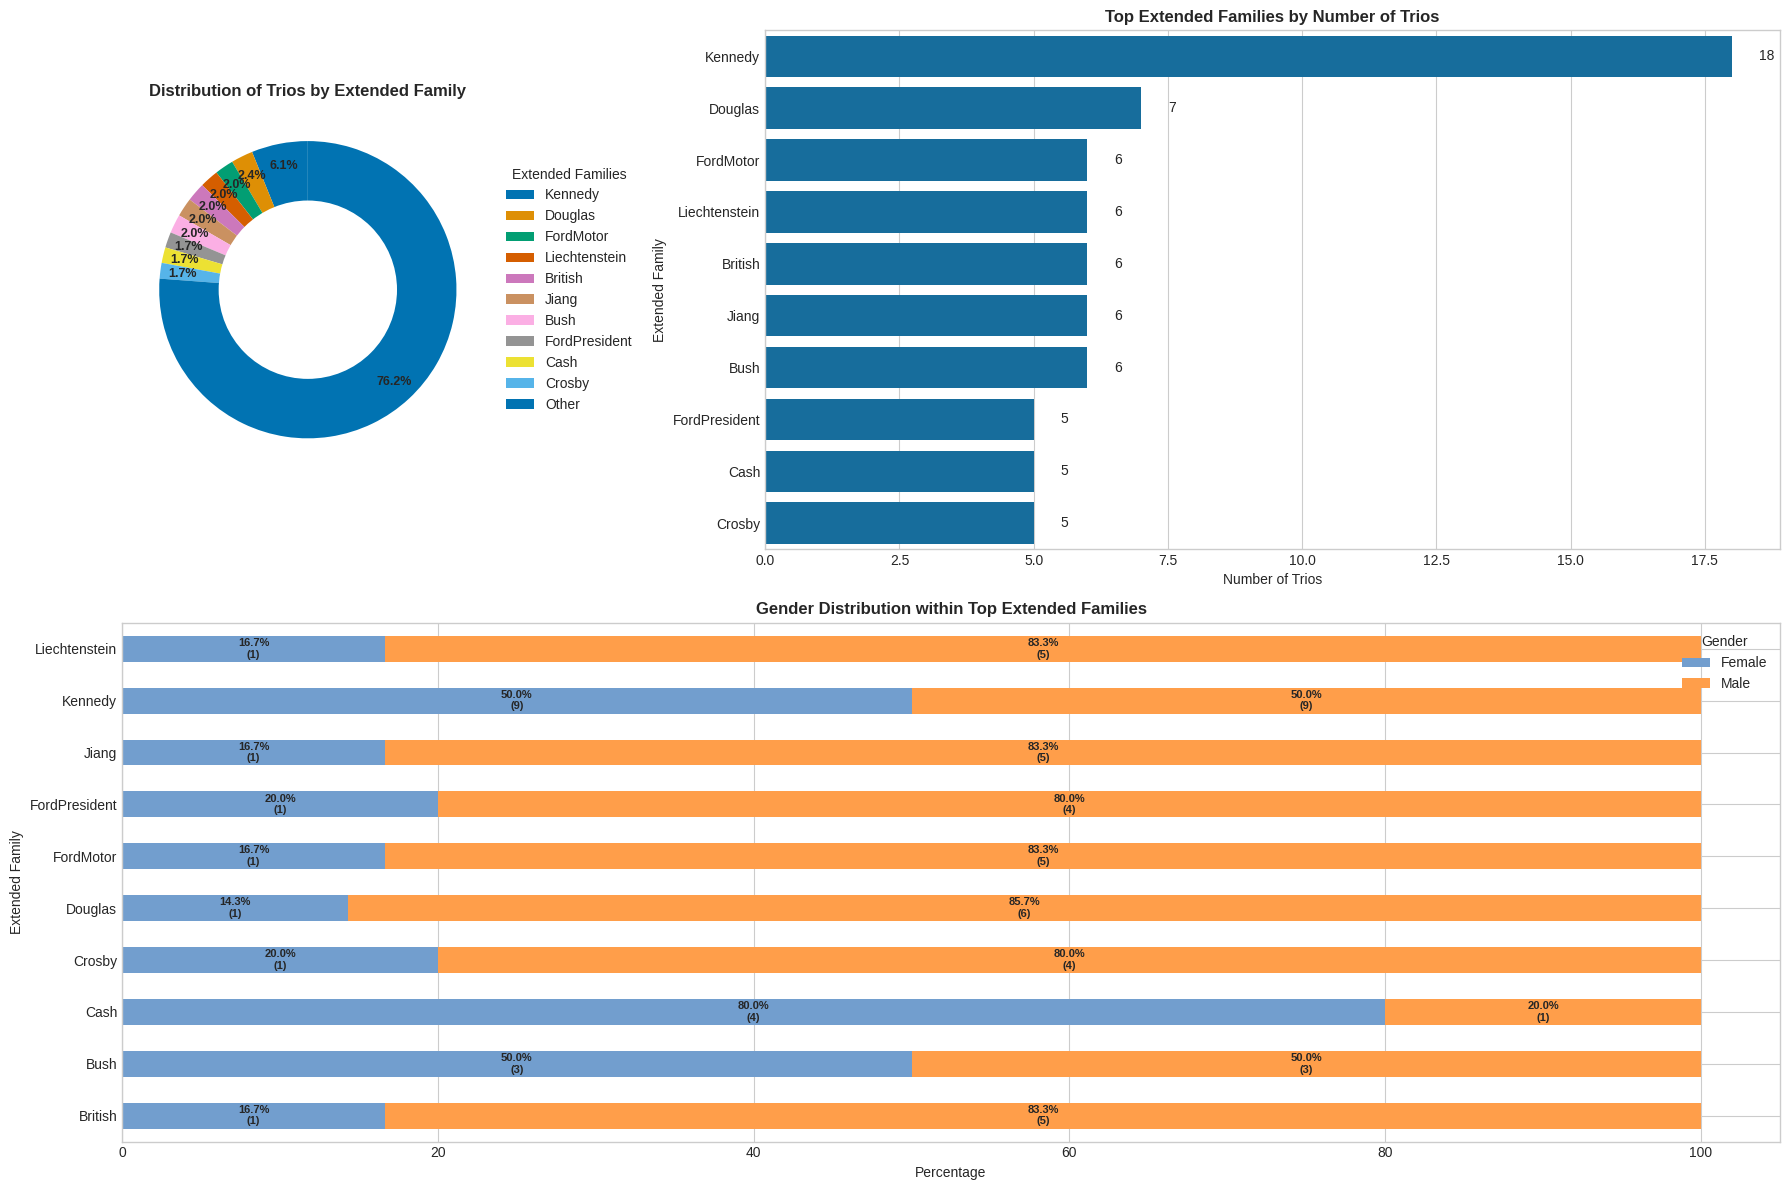

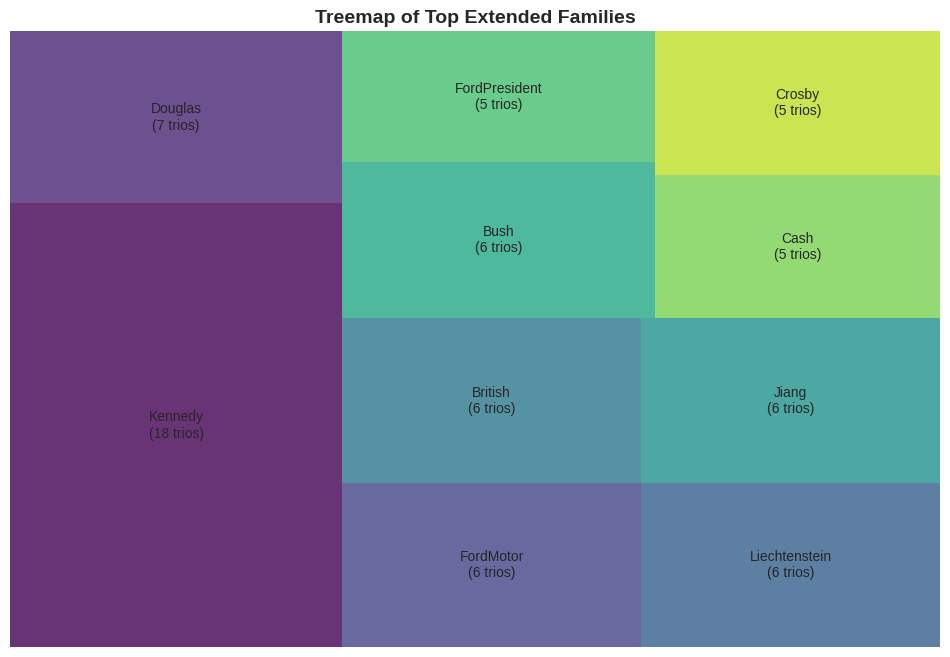


Descriptive Statistics of Trio Counts per Extended Family:
count    91.000000
mean      3.230769
std       2.087406
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      18.000000
Name: count, dtype: float64


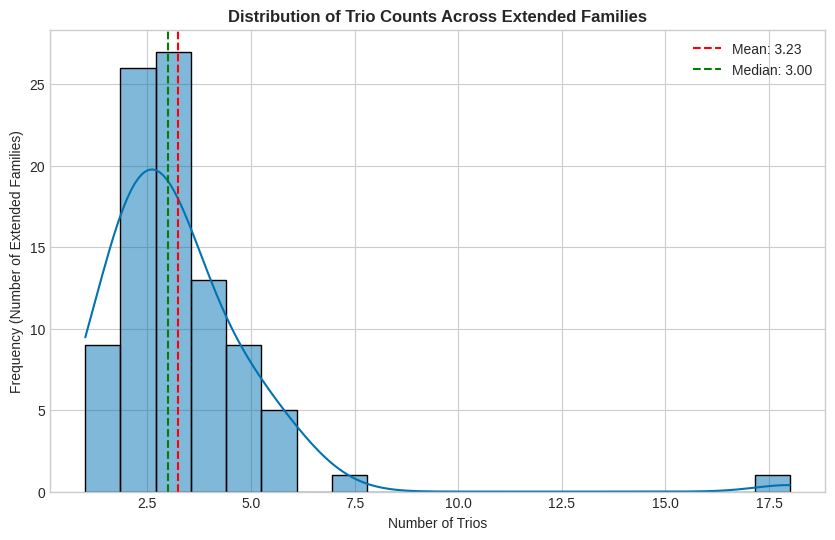

In [ ]:
# Set the style for more attractive visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

def create_trio_visualizations(df_trios):
    """Create visualizations for the family trios DataFrame"""

    # 1. Count trios per extended family
    family_counts = df_trios['extended_family'].value_counts()

    # For better visualizations, let's focus on top families and group the rest
    top_n = 10  # Top families to display individually
    top_families = family_counts.head(top_n)
    other_count = family_counts[top_n:].sum()

    # Create a new series with top N families + "Other"
    plot_data = top_families.copy()
    plot_data['Other'] = other_count

    # Set up the figure with subplots for multiple charts
    fig = plt.figure(figsize=(18, 12))

    # 1. Pie Chart of Trios by Extended Family
    ax1 = plt.subplot2grid((2, 3), (0, 0))
    wedges, texts, autotexts = ax1.pie(
        plot_data,
        autopct='%1.1f%%',
        textprops={'fontsize': 9, 'fontweight': 'bold'},
        startangle=90,
        pctdistance=0.85
    )
    # Draw a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    ax1.add_patch(centre_circle)

    # Add legend to the pie chart
    ax1.legend(
        wedges,
        plot_data.index,
        title="Extended Families",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    ax1.set_title('Distribution of Trios by Extended Family', fontsize=12, fontweight='bold')

    # 2. Horizontal Bar Chart of Top Families
    ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
    bars = sns.barplot(x=top_families.values, y=top_families.index, ax=ax2)

    # Add value annotations to the bars
    for i, v in enumerate(top_families.values):
        ax2.text(v + 0.5, i, str(v), va='center')

    ax2.set_title('Top Extended Families by Number of Trios', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Number of Trios')
    ax2.set_ylabel('Extended Family')

    # 3. Gender Distribution within Top Families
    ax3 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

    # Get gender counts for top families
    gender_by_family = df_trios[df_trios['extended_family'].isin(top_families.index)].groupby(
        ['extended_family', 'gender']
    ).size().unstack(fill_value=0)

    # Calculate percentages for a stacked percentage bar chart
    gender_by_family_pct = gender_by_family.div(gender_by_family.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart
    gender_by_family_pct.plot(
        kind='barh',
        stacked=True,
        ax=ax3,
        color=['#729ECE', '#FF9E4A']  # Blue for Male, Orange for Female
    )

    # Add annotations
    for i, (idx, row) in enumerate(gender_by_family_pct.iterrows()):
        prev_width = 0
        for col, width in row.items():
            if width > 5:  # Only annotate if segment is wide enough
                ax3.text(
                    prev_width + width/2,
                    i,
                    f"{width:.1f}%\n({gender_by_family.loc[idx, col]})",
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )
            prev_width += width

    ax3.set_title('Gender Distribution within Top Extended Families', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Percentage')
    ax3.set_ylabel('Extended Family')
    ax3.legend(title='Gender')

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('family_trios_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 4. Create an additional visualization - Treemap
    try:
        # Try importing squarify for treemap
        import squarify

        # Create a new figure
        plt.figure(figsize=(12, 8))

        # Create a treemap
        colors = plt.cm.viridis(np.linspace(0, 0.9, len(top_families)))
        squarify.plot(
            sizes=top_families.values,
            label=[f"{family}\n({count} trios)" for family, count in top_families.items()],
            alpha=0.8,
            color=colors
        )
        plt.axis('off')
        plt.title('Treemap of Top Extended Families', fontsize=14, fontweight='bold')
        plt.savefig('family_treemap.png', dpi=300, bbox_inches='tight')
        plt.show()
    except ImportError:
        print("Squarify package not found. Skipping treemap visualization.")

# Usage example
create_trio_visualizations(df_trios)

# Additional analysis - Trio count per extended family with descriptive statistics
trio_stats = df_trios['extended_family'].value_counts().describe()
print("\nDescriptive Statistics of Trio Counts per Extended Family:")
print(trio_stats)

# Create histogram of trio counts distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_trios['extended_family'].value_counts(), bins=20, kde=True)
plt.title('Distribution of Trio Counts Across Extended Families', fontsize=12, fontweight='bold')
plt.xlabel('Number of Trios')
plt.ylabel('Frequency (Number of Extended Families)')
plt.axvline(trio_stats['mean'], color='red', linestyle='--', label=f"Mean: {trio_stats['mean']:.2f}")
plt.axvline(trio_stats['50%'], color='green', linestyle='--', label=f"Median: {trio_stats['50%']:.2f}")
plt.legend()
plt.savefig('trio_count_distribution.png', dpi=300)
plt.show()

In [ ]:
df_trios.shape

(294, 6)